<a href="https://colab.research.google.com/github/tiwari25o8/Human-Face-Detection/blob/main/Human_Face_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from tensorflow.keras import datasets, layers, models
from keras import backend as K
from keras import models
from keras.applications.vgg16 import VGG16

In [ ]:
!unzip /content/drive/MyDrive/gender_dataset_face-20230304T032257Z-001.zip -d /content/drive/MyDrive/gender_data

Archive:  /content/drive/MyDrive/gender_dataset_face-20230304T032257Z-001.zip
  inflating: /content/drive/MyDrive/gender_data/gender_dataset_face/.DS_Store  
   creating: /content/drive/MyDrive/gender_data/gender_dataset_face/.ipynb_checkpoints/
  inflating: /content/drive/MyDrive/gender_data/gender_dataset_face/man/face_1309.jpg  
  inflating: /content/drive/MyDrive/gender_data/gender_dataset_face/man/face_830.jpg  
  inflating: /content/drive/MyDrive/gender_data/gender_dataset_face/man/face_620.jpg  
  inflating: /content/drive/MyDrive/gender_data/gender_dataset_face/man/face_1393.jpg  
  inflating: /content/drive/MyDrive/gender_data/gender_dataset_face/man/face_916.jpg  
  inflating: /content/drive/MyDrive/gender_data/gender_dataset_face/man/face_1025.jpg  
  inflating: /content/drive/MyDrive/gender_data/gender_dataset_face/man/000064.jpg  
  inflating: /content/drive/MyDrive/gender_data/gender_dataset_face/man/51_0_0_20170111181750495.jpg.chip.jpg  
  inflating: /content/drive/MyDr

In [ ]:
class SmallerVGGNet:
    @staticmethod
    def vgg_net(width, height, depth, classes):
            conv_base = VGG16(weights='imagenet',
                          include_top=False,
                          input_shape=(height, width, depth))
            model = models.Sequential()
            model.add(conv_base)
            model.add(Flatten())
            model.add(Dense(1024, activation='relu'))
            model.add(BatchNormalization())
            model.add(Dropout(0.5))
            model.add(Dense(classes, activation='sigmoid'))
            return model

In [ ]:
import matplotlib
matplotlib.use("Agg")
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam, SGD, RMSprop
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
# from model.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os
import glob
from keras.callbacks import *
from keras.models import load_model

In [ ]:
import glob
import os
import random
epochs = 50
lr = 1e-3
batch_size = 32
img_dims = (96,96,3)

data = []
labels = []

# load image files from the dataset
image_files = [f for f in glob.glob('/content/drive/MyDrive/gender_data/gender_dataset_face' + "/**/*", recursive=True) 
if not os.path.isdir(f)] 
random.seed(42)
random.shuffle(image_files)

# create groud-truth label from the image path
for img in image_files:

    image = cv2.imread(img)
    # print(img)
    image = cv2.resize(image, (96,96))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2]
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label])

# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=2)
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

# build model
# model = SmallerVGGNet.build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
#                             classes=2)
model = SmallerVGGNet.vgg_net(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
#checkpoint save
filepath="epochs:{epoch:03d}-val_accuracy:{val_accuracy:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# model.load_model("Model_weights/epochs:009-val_accuracy:0.797.hdf5")

# train the model
history = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1,callbacks=callbacks_list)
# model.load_weights("Model_weights/epochs:{epoch:03d}-val_accuracy:{val_accuracy:.3f}.hdf5")

# save the model to disk

58889256/58889256 [==============================] - 2s 0us/step


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-6-a126147b0e77>:66: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 0.7401 - accuracy: 0.5856
Epoch 1: val_accuracy improved from -inf to 0.74560, saving model to epochs:001-val_accuracy:0.746.hdf5
92/92 [==============================] - 22s 136ms/step - loss: 0.7401 - accuracy: 0.5856 - val_loss: 1.4755 - val_accuracy: 0.7456
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 0.5631 - accuracy: 0.7372
Epoch 2: val_accuracy did not improve from 0.74560
92/92 [==============================] - 11s 122ms/step - loss: 0.5631 - accuracy: 0.7372 - val_loss: 34.9303 - val_accuracy: 0.5020
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 0.4843 - accuracy: 0.7834
Epoch 3: val_accuracy improved from 0.74560 to 0.81055, saving model to epochs:003-val_accuracy:0.811.hdf5
92/92 [==============================] - 12s 126ms/step - loss: 0.4843 - accuracy: 0.7834 - val_loss: 0.5746 - val_accuracy: 0.8106
Epoch 4/50
92/92 [==============================] - ETA: 0s

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('/content/drive/My Drive/Interface_model/result.plot')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 model = load_model("/content/drive/MyDrive/epochs_037-val_accuracy_0.959.hdf5")

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(testX)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(testY,axis = 1)

24/24 [==============================] - 1s 27ms/step


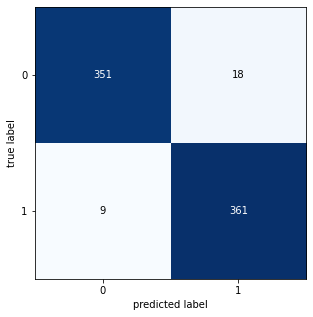

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
# plt.show()
fig

In [ ]:
!pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 83.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046382 sha256=4966a18de2691559fcd9de2f627e2dc062fb4d1b1983d081008fb92f840a4b14
  Stored in directory: /root/.cache/pip/wheels/96/ad/4c/d80d4bf4143c154ab297e2384915c89aff43d77d1787b9a702
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12080 sha256=ada61c9e82aa961f6cc6f53971f59239e6b024e59b6aa70681f4300dabae0430
  Stored in directory: /root/.cache/pip/wheels/d7/d9/89/a3f31c76ff6d51dc3b1575628f59afe59e4ceae3f2748cd7ad
Successfully built cvlib progressbar


In [ ]:
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array

from keras.models import load_model
# from keras.utils import get_file
import numpy as np
import argparse
import cv2
import os
import cvlib as cv

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Shravan photo.jpg')

if image is None:
    print("Could not read input image")
    exit()

# load pre-trained model
model = load_model("/content/drive/MyDrive/epochs_037-val_accuracy_0.959.hdf5")

# detect faces in the image
face, confidence = cv.detect_face(image)

classes = ['man','woman']
# loop through detected faces
for idx, f in enumerate(face):

     # get corner points of face rectangle       
    (startX, startY) = f[0], f[1]
    (endX, endY) = f[2], f[3]

    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)

    # crop the detected face region
    face_crop = np.copy(image[startY:endY,startX:endX])

    # preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (96,96))
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # apply gender detection on face
    conf = model.predict(face_crop)[0]
    print(conf)
    print(classes)

    # get label with max accuracy
    idx = np.argmax(conf)
    label = classes[idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # write label and confidence above face rectangle
    if conf[idx] * 100 > 50.0:
        cv2.putText(image, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 1)
# cv2.imwrite('/content/',image)
# display output
# cv2.imshow("gender detection", image)

# # press any key to close window           
# cv2.waitKey(0)

# # save output
cv2.imwrite("gender_detection.jpg", image)

# # release resources
# cv2.destroyAllWindows()

1/1 [==============================] - 2s 2s/step
[0.89229834 0.12571608]
['man', 'woman']


True